##  Homework 1 - Problem 6 : Presidential Logorrea

### Student: Dimitrios Tanoglidis

#### Collaborator: Ying Cai

In [1]:
#Import stuff
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    #plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

In [2]:
# Import speeches

with open('speeches.json', 'r') as f:
    speeches = json.loads(f.read())
    
# Create dataframe
df = pd.DataFrame.from_dict(speeches, orient='columns')
df.describe()

,president,text,year
count,226,226,226
unique,41,226,223
top,Franklin D. Roosevelt,"Mr. President, Mr. Speaker, Members of the Uni...",1961
freq,12,1,2


Let's print the last speech here, to see it...

In [63]:
#Last_speech = df.at[225, "text"]

#print(Last_speech)

#### (a) Parsing of the SOU addresses

I understand that we had to write our code for the parsing of the SOU addresses, but due to limited time I will use the python package  nltk.tokeize (natural language toolkit) and especially the routines sent_tokenize and word_tokenize


In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize


# Function that uses the above routines
# and parces a text; returns number of sentences and 
# mean sentence length
def parsing(text):
    sentances = sent_tokenize(text) # All the sentances
    num_sent = len(sentances) # Number of sentances
    words = word_tokenize(text) # All the words
    num_words = len(words) #Number of words
    aver_length = float(num_words)/float(num_sent) #Average length in words
    return num_sent, aver_length
    


[nltk_data] Downloading package punkt to /Users/Dimitris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### (b) Regressions...

We plot and compute two linear regressions : number of sentences in the address/ year and mean sentence length/ year.

In [5]:
# Now, using the above, calculate number of sentences and 
# mean sentence length/year, for the 226 adresses above

# Initialize
num_sent = np.zeros(226)
av_length = np.zeros(226)

# Populatate

for i in range(226):
    SOU_add = df.at[i, "text"] 
    num_sent[i], av_length[i] = parsing(SOU_add)

In [6]:
# Let's print the minimum and maximum number of sentences, to see if they look reasonable
print(min(num_sent))
print(max(num_sent))

36.0
1349.0


In [7]:
years = pd.to_numeric(df["year"]) #The years

Calculate the linear regressions now, using $\hat{\beta} = (X^T X)^{-1}X^T y$.

In [21]:
X = np.zeros([226,2])
X[:,0] = years
X[:,1] = 1

beta, c =np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),num_sent)

print(beta, c)

x_lin = np.linspace(min(years)-20, max(years)+20, 1000)
y_fit = beta*x_lin + c

(0.7855113265090372, -1214.1050807238103)


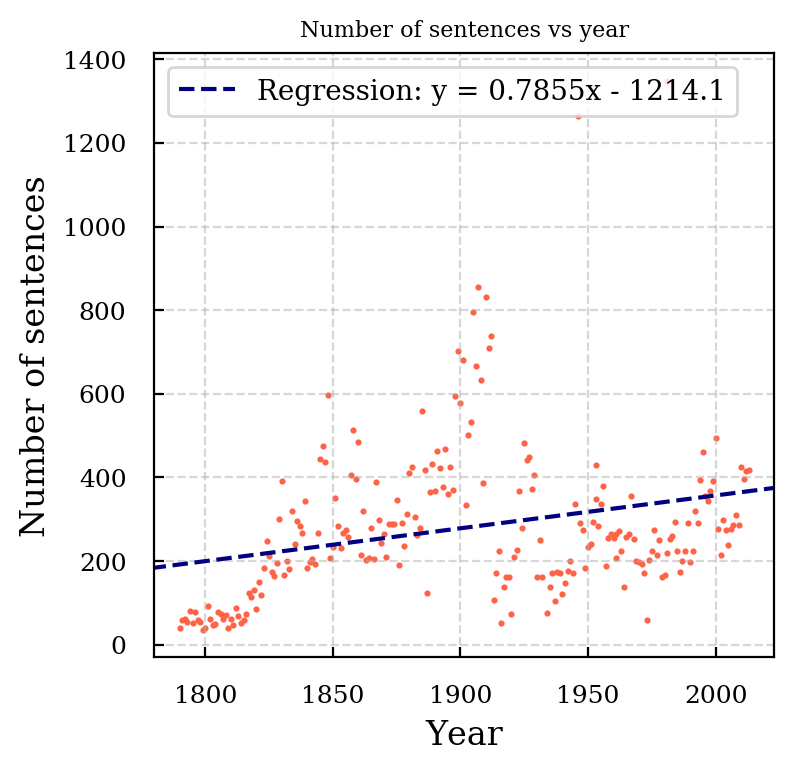

In [25]:
fig = plt.subplots(figsize = (4.0,4.0))

plt.scatter(years, num_sent, s=1.5, c='tomato')
plt.plot(x_lin, y_fit, c='navy', ls='--', label='Regression: y = 0.7855x - 1214.1')

plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of sentences", fontsize=12)
plt.title('Number of sentences vs year', fontsize=8)

plt.xlim(min(years)-10,max(years)+10)
plt.show()

In [26]:
beta2, c2 =np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),av_length)

print(beta2, c2)
y_fit2 = beta2*x_lin + c2

(-0.12306160457807824, 266.8401821975583)


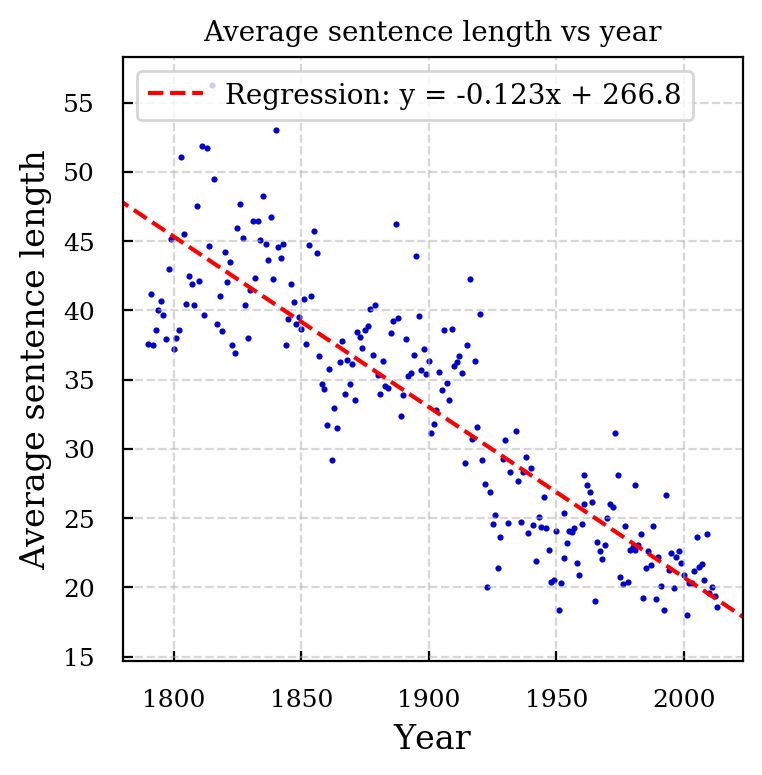

In [28]:
fig = plt.subplots(figsize = (4.0,4.0))

plt.scatter(years, av_length , s=1.5, c='mediumblue')
plt.plot(x_lin, y_fit2, c='red', ls='--', label='Regression: y = -0.123x + 266.8')



plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='upper left', fontsize=10)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Average sentence length", fontsize=12)
plt.title('Average sentence length vs year', fontsize=10)
plt.xlim(min(years)-10,max(years)+10)
plt.show()

From above graphs we can see that the number of sentences in address increases slowly and the mean sentence length in words decreases in gerenal as time goes by.Two outliers of the number of sentences are year 1946 by Harry S Trueman and year 1981 by Jimmy Carter. The 1946 address combined both State of the Union Message and the Budget and the 1981 address was in written form, partly having explained the surprising length of them.The reason of such phenomenon might be respectively that more things need to be included in the address and that people prefer conciseness more as time goes by.

#### (c) Regressions of total number of words

In [41]:
def word_parsing(text):
    words = word_tokenize(text) # All the words
    num_words = len(words) #Number of words
    return num_words

In [42]:
num_words = np.zeros(226)

for i in range(226):
    SOU_add = df.at[i, "text"] 
    num_words[i] = word_parsing(SOU_add)

In [43]:
words_before = num_words[years<=1912] #Number of words for the years <=1912
words_after = num_words[years>=1913] # Number of words for the years >=1913

years_before = years[years<=1912] 
years_after = years[years>=1913] 

Calculate regressions as before, in the two cases....

In [44]:
X_before = np.zeros([len(years_before),2])
X_before[:,0] = years_before
X_before[:,1] = 1

X_after = np.zeros([len(years_after),2])
X_after[:,0] = years_after
X_after[:,1] = 1

beta_before, c_before =np.dot(np.dot(np.linalg.inv(np.dot(X_before.transpose(),X_before)),X_before.transpose()),words_before)
beta_after, c_after =np.dot(np.dot(np.linalg.inv(np.dot(X_after.transpose(),X_after)),X_after.transpose()),words_after)

In [45]:
print(beta_before, c_before)
print(beta_after, c_after)

(152.065676954974, -270689.0395883761)
(8.65606852005006, -10462.82967443823)


In [49]:
x_lin_bef = np.linspace(min(years_before)-20, max(years_before)+20, 1000)
y_fit_bef = beta_before*x_lin_bef + c_before

x_lin_aft = np.linspace(min(years_after)-20, max(years_after)+20, 1000)
y_fit_aft = beta_after*x_lin_aft + c_after

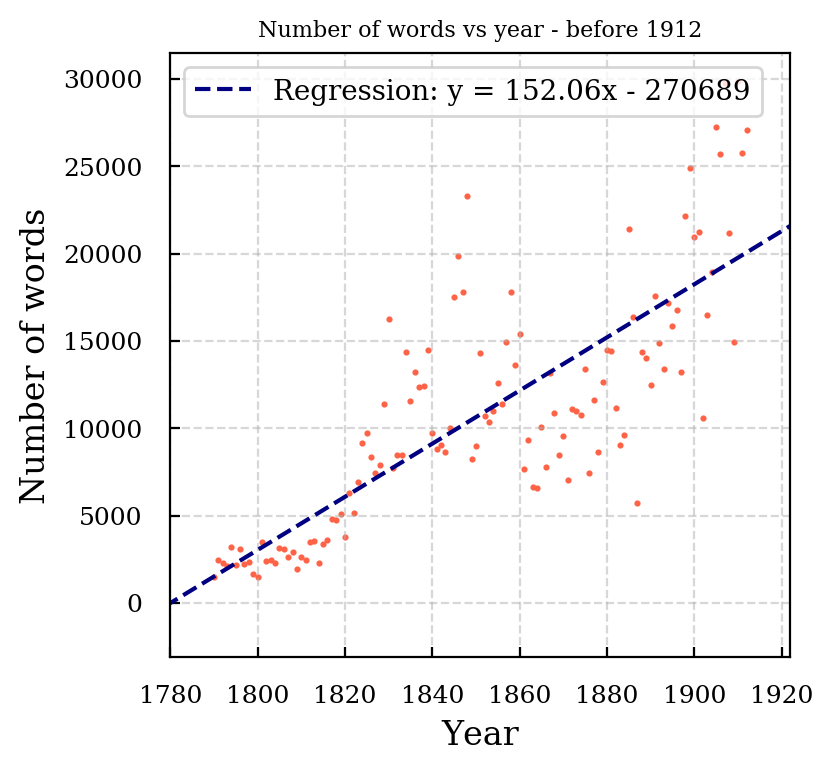

In [50]:
fig = plt.subplots(figsize = (4.0,4.0))

plt.scatter(years_before, words_before, s=1.5, c='tomato')
plt.plot(x_lin_bef, y_fit_bef, c='navy', ls='--', label='Regression: y = 152.06x - 270689')

plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of words", fontsize=12)
plt.title('Number of words vs year - before 1912', fontsize=8)

plt.xlim(min(years_before)-10,max(years_before)+10)
plt.show()

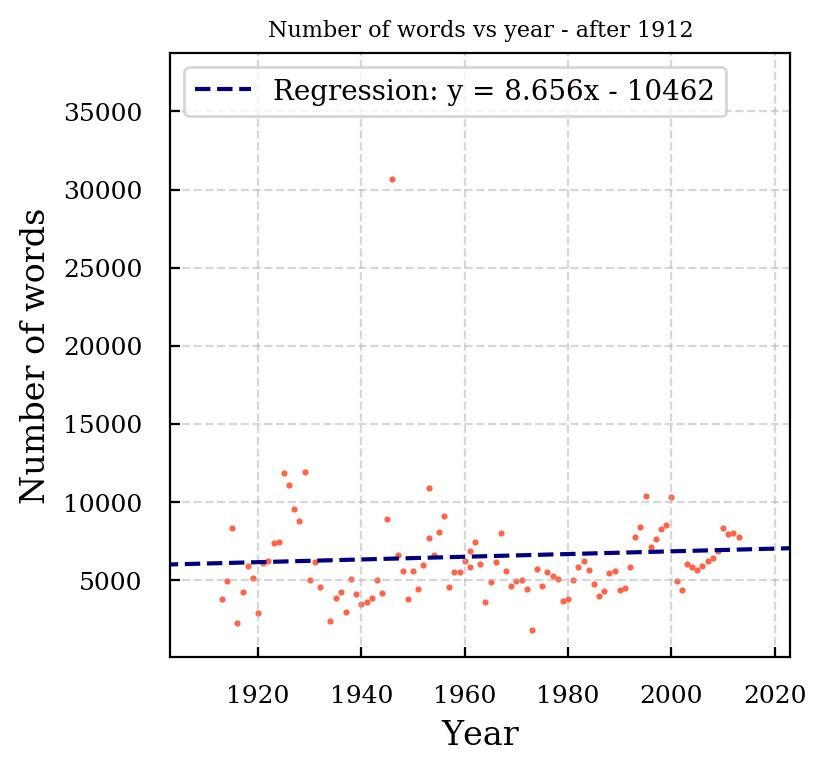

In [51]:
fig = plt.subplots(figsize = (4.0,4.0))

plt.scatter(years_after, words_after, s=1.5, c='tomato')
plt.plot(x_lin_aft, y_fit_aft, c='navy', ls='--', label='Regression: y = 8.656x - 10462')

plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of words", fontsize=12)
plt.title('Number of words vs year - after 1912', fontsize=8)

plt.xlim(min(years_after)-10,max(years_after)+10)
plt.show()

In general, the number of words in the address increased with time rather steadily before 1912 yet its increasing trend became very slight after 1912 if we negelect the two outliers — 1946 and 1981. From 1801 to 1912, the address was ususally delivered in written form, which allows longer text and more details.After 1913 Woodrow Wilson re-established the practice of delivering the address in-person and orally, which requires the content not to be too long, otherwise the attention of audiences would get distracted.

#### (d)

In [55]:
min_aver = min(av_length)
max_aver = max(av_length)

pos_min = np.where(av_length==min_aver)
pos_max = np.where(av_length==max_aver)

In [60]:
print("President with minimum average sentancses:")
print(df.at[int(pos_min[0]), "president"])

President with minimum average sentancses:
George W. Bush


In [61]:
print("President with maximum average sentancses:")
print(df.at[int(pos_max[0]), "president"])

President with maximum average sentancses:
James Madison
